In [17]:
import os
import sys
from pathlib import Path
import numpy as np
from scipy.ndimage import center_of_mass
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
PIPELINE_ROOT = Path('../src').resolve().parent.parent
sys.path.append(PIPELINE_ROOT.as_posix())

from library.utilities.utilities_process import read_image, write_image


In [77]:
reg_path = '/net/birdstore/Active_Atlas_Data/data_root/brains_info/registration'
atlas_name = 'Allen_10um_coronal.tif'
atlas_path = os.path.join(reg_path, atlas_name)
coronal = read_image(atlas_path)
print(coronal.dtype, coronal.shape, coronal.ndim)

uint16 (1320, 800, 1140) 3


(800, 1320, 1140)


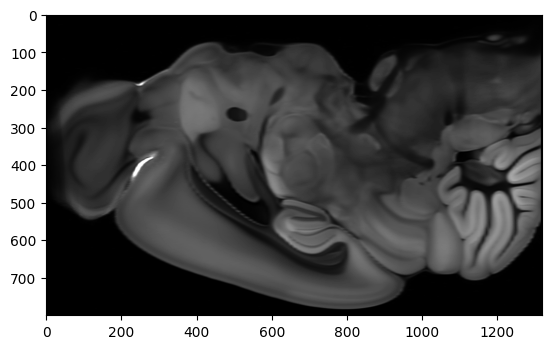

In [76]:
arr = coronal.copy()
sagittal = np.rot90(arr, axes=(0,1))
#sagittal = np.flip(sagittal, axis=0)
print(sagittal.shape)
plt.imshow(sagittal[:,:,650], cmap="gray")

sagittal info (1140, 800, 1320), uint16


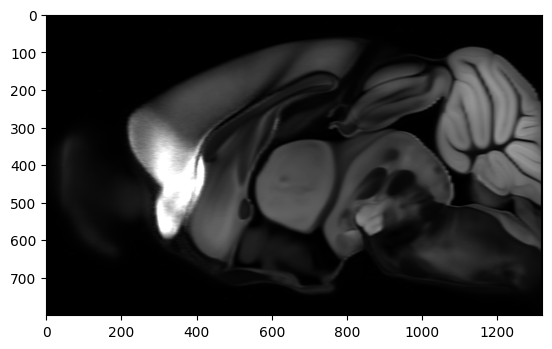

In [79]:
arr = coronal.copy()
swapped = np.swapaxes(coronal, 0,2)
sagittal = swapped.astype(np.uint16)
print(f'sagittal info {sagittal.shape}, {sagittal.dtype}')

midpoint = sagittal.shape[0] // 2
plt.imshow(sagittal[midpoint,:,:], cmap="gray")

In [80]:
#allen10 800,1320,1140
#DK41 1000,1800,456
rowpad = 200
colpad = 500
padded = sagittal.copy()
print(f'padded volume shape={padded.shape} dtype={padded.dtype}')

padded = np.concatenate((padded, np.zeros((padded.shape[0], rowpad, padded.shape[2])) ), axis=1)
print(f'padded volume shape={padded.shape} dtype={padded.dtype}')

padded = np.concatenate((padded, np.zeros((padded.shape[0], padded.shape[1], colpad)) ), axis=2)
padded = padded.astype(np.uint16)
print(f'padded volume shape={padded.shape} dtype={padded.dtype}')


padded volume shape=(1140, 800, 1320) dtype=uint16
padded volume shape=(1140, 1000, 1320) dtype=float64
padded volume shape=(1140, 1000, 1820) dtype=uint16


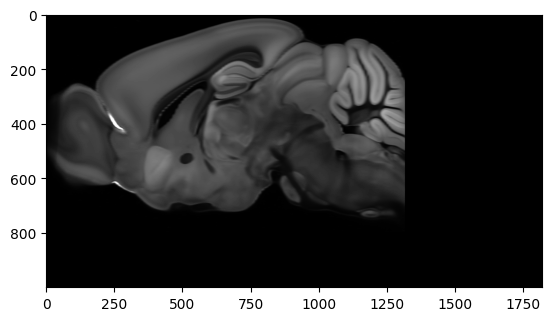

In [81]:
midpoint = padded.shape[2] // 2
plt.imshow(padded[500,:,:], cmap="gray")

In [82]:
outfile = 'Allen_10um_sagittal_padded.tif'
outpath = os.path.join(reg_path, outfile)
write_image(outpath, padded)

In [83]:
padded.shape

(1140, 1000, 1820)